In [87]:
import numpy as np
import pandas as pd

# one-hot encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# for k-fold validation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

# Importing dataset
df = pd.read_csv('AB_US_2020.csv')
# dropping neighbourhood group as it has many missing values
df = df.drop('neighbourhood_group', axis=1)

In [2]:
a_data = df
lower_bound = .25
upper_bound = .75
iqr = a_data[a_data['price'].between(a_data['price'].quantile(lower_bound), a_data['price'].quantile(upper_bound), inclusive=True)]
iqr = iqr[iqr['number_of_reviews'] > 0]
iqr = iqr[iqr['calculated_host_listings_count'] < 10]
iqr = iqr[iqr['number_of_reviews'] < 200]
iqr = iqr[iqr['minimum_nights'] < 10]
iqr = iqr[iqr['reviews_per_month'] < 5]

In [5]:
df = iqr

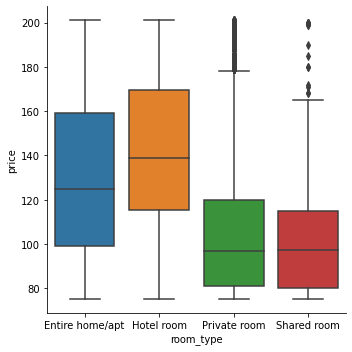

In [6]:
# transforming object columns to category
df['city'] = df['city'].astype('category')
df['room_type'] = df['room_type'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')

# plotting price across room types
sns.catplot(x='room_type', y='price', kind='box', data=df)

In [78]:
# one-hot encoding
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_room_type = OH_encoder.fit_transform(df[['room_type']])
encoded_room_type = pd.DataFrame(encoded_room_type)

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_city = OH_encoder.fit_transform(df[['city']])
encoded_city = pd.DataFrame(encoded_city)

In [79]:
#ec = encoded_city.tolist()
#ert = encoded_room_type.tolist()

#len(ert[0])

In [80]:
# our features and independant variables
feature_list = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count' ,'availability_365']
X = df[feature_list]
y = df['price']
print(len(X))
# Add one-hot encoded columns to numerical features
#X = pd.concat([X, encoded_city, encoded_room_type], axis=1)

#X['encoded_city'] = ec
#X['encoded_room_type'] = ert
print(len(X))
# splitting into training and testing sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state = 1)


57440
57440


In [82]:
ec = pd.DataFrame(ec)
X = X.reset_index()
display(X.head())
#display(ec.head())
X = pd.concat([X,encoded_city,encoded_room_type], axis = 1)
print (len(X))

level_0  index  minimum_nights  number_of_reviews  \
0        0      5               7                 54   
1        1     12               2                 40   
2        2     20               3                 30   
3        3     25               2                  7   
4        4     27               1                100   

   calculated_host_listings_count  availability_365    0    1    2    3  ...  \
0                               1               294  1.0  0.0  0.0  0.0  ...   
1                               1               339  1.0  0.0  0.0  0.0  ...   
2                               1               266  1.0  0.0  0.0  0.0  ...   
3                               7                 0  1.0  0.0  0.0  0.0  ...   
4                               1               252  1.0  0.0  0.0  0.0  ...   

    22   23   24   25   26   27    0    1    2    3  
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 38 columns]

57440


In [84]:
rf_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=70, random_state=0))])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(rf_pipeline, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

In [85]:
import math
print(n_scores)
print(math.sqrt(-1 * n_scores.mean()))

[-1272.43978867 -1272.96104039 -1283.00618709 -1295.47231882
 -1262.5984648  -1282.67544961 -1251.23401477 -1271.55038454
 -1286.42140841 -1282.60852995 -1268.10194865 -1265.70656687
 -1299.87855979 -1282.51796935 -1289.07367262]
35.7456256571576


In [83]:
# model building
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)

# model predictions
rf_predictions = forest_model.predict(valid_X)
print('RMSE for Random Forest: ', mean_squared_error(valid_y, rf_predictions, squared=False))

RMSE for Random Forest:  39.43475789941313


In [93]:
price = df['price'].tolist()
mean, std = np.mean(price), np.std(price)
cutoff = mean+std
df_o = df.loc[df['price'] <= cutoff]
len(df_o)/len(df)

0.965013493784011

In [94]:
df=df_o
feature_list = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count' ,'availability_365']
X = df[feature_list]
y = df['price']

X = X.reset_index()
X = pd.concat([X, encoded_city, encoded_room_type], axis=1)

train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state = 1)

# model building
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)

# model predictions
rf_predictions = forest_model.predict(valid_X)
print('RMSE for Random Forest: ', mean_squared_error(valid_y, rf_predictions, squared=False))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').